In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [212]:
df = pd.read_csv("df.csv")

/var/folders/dg/p2fdg8_94cbc43n46s9_10rc0000gn/T/ipykernel_97524/1162187833.py:1: DtypeWarning: Columns (1,8,10,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df.csv")


In [3]:
df.head()

,delivery_id,version_number,system_code,cycle_date,delivery_number,record_type,settlement_date,receiving_inst_irn,region_code,region_node_code,...,sending_inst_name,system_code_1,payment_id,pos_code,value,volume,stream_code,stream_name,stream_type,avg_val
0,5d9fb58e-8af6-4c77-8bc5-c9204d4145ce,1,A,2019-05-13,R5,D,2019-05-14,3,NaN,TO,...,Toronto-Dominion Bank,A,76a6f506-1ab2-4c82-b03a-74a828909c17,NaN,933.00,4.0,A,ABM Adjust.,E,233.250000
1,295cfe4a-6851-474a-abfd-18fabafb7994,1,A,2019-05-02,Z4,D,2019-05-03,3,NaN,TO,...,Toronto-Dominion Bank,A,e97ca381-540f-41c4-baf3-6ac571e4fe6a,NaN,1016433.51,272.0,S,Image Returns,E,3736.887904
2,33293193-35cb-48b7-bc3e-91368bbaafc1,1,A,2014-09-19,R5,D,2014-09-22,815,NaN,TO,...,Bank of Montreal,A,cd22507e-3dc3-4387-8a1d-6c902c2e9e78,NaN,413.69,6.0,K,Online Pmt Ref,E,68.948333
3,8c99be93-68c5-46e8-8f1b-117462c0e282,1,A,2018-04-16,R3,D,2018-04-17,815,NaN,MT,...,Royal Bank of Canada,A,5e5c4815-d439-4bad-89ee-23282186010d,NaN,259.61,5.0,K,Online Pmt Ref,E,51.922000
4,80ca5e2d-a28c-4f37-9b5d-d37557236290,1,A,2015-06-15,R5,D,2015-06-16,815,NaN,TO,...,Royal Bank of Canada,A,ac7e0eda-7e18-4f2d-9527-c15cffe84a50,NaN,115.48,5.0,K,Online Pmt Ref,E,23.096000


In [4]:
df.shape

(7363135, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7363135 entries, 0 to 7363134
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   delivery_id            object 
 1   version_number         object 
 2   system_code            object 
 3   cycle_date             object 
 4   delivery_number        object 
 5   record_type            object 
 6   settlement_date        object 
 7   receiving_inst_irn     int64  
 8   region_code            object 
 9   region_node_code       object 
 10  reopening_reason_code  object 
 11  sending_inst_irn       int64  
 12  sent_date              object 
 13  sent_time              int64  
 14  sender_user_id         object 
 15  sender_terminal_id     object 
 16  contested_date         object 
 17  contested_time         float64
 18  contestor_user_id      object 
 19  contestor_terminal_id  object 
 20  settle_type            object 
 21  receiving_inst_name    object 
 22  sending_inst_name 

In [6]:
round(df.describe(),2)

,receiving_inst_irn,sending_inst_irn,sent_time,contested_time,value,volume,avg_val
count,7363135.00,7363135.00,7363135.00,80045.00,7.363135e+06,7363135.00,7.363135e+06
mean,176.75,150.03,1077.52,502.36,5.606193e+06,6139.05,1.198508e+05
std,323.16,310.18,982.43,756.86,3.071346e+07,38113.58,2.407976e+06
min,1.00,1.00,0.00,0.00,-1.289984e+09,-23408629.00,-8.500000e+07
25%,3.00,3.00,50.00,105.00,1.715920e+04,4.00,5.000000e+02
50%,6.00,4.00,1003.00,146.00,1.883470e+05,40.00,2.031510e+03
75%,177.00,16.00,2227.00,340.00,1.946735e+06,795.00,7.781770e+03
max,869.00,869.00,2359.00,2359.00,2.204540e+09,23408629.00,9.700000e+08


In [7]:
df.isna().sum()/df.shape[0]*100

delivery_id               0.000000
version_number            0.000000
system_code               0.000000
cycle_date                0.000000
delivery_number           0.000000
record_type               0.000000
settlement_date           0.000000
receiving_inst_irn        0.000000
region_code              33.936048
region_node_code         66.063952
reopening_reason_code    99.999212
sending_inst_irn          0.000000
sent_date                 0.000788
sent_time                 0.000000
sender_user_id            0.000149
sender_terminal_id        0.000149
contested_date           98.913642
contested_time           98.912895
contestor_user_id        98.913533
contestor_terminal_id    98.913533
settle_type               0.000000
receiving_inst_name       0.000000
sending_inst_name         0.000000
system_code_1             0.000000
payment_id                0.000000
pos_code                 98.481815
value                     0.000000
volume                    0.000000
stream_code         

In [8]:
df.columns

Index(['delivery_id', 'version_number', 'system_code', 'cycle_date',
       'delivery_number', 'record_type', 'settlement_date',
       'receiving_inst_irn', 'region_code', 'region_node_code',
       'reopening_reason_code', 'sending_inst_irn', 'sent_date', 'sent_time',
       'sender_user_id', 'sender_terminal_id', 'contested_date',
       'contested_time', 'contestor_user_id', 'contestor_terminal_id',
       'settle_type', 'receiving_inst_name', 'sending_inst_name',
       'system_code_1', 'payment_id', 'pos_code', 'value', 'volume',
       'stream_code', 'stream_name', 'stream_type', 'avg_val'],
      dtype='object')

In [39]:
df=df.drop('reopening_reason_code',axis=1)
df=df.drop('contested_date',axis=1)
df=df.drop('contested_time',axis=1)
df=df.drop('contestor_user_id',axis=1)
df=df.drop('contestor_terminal_id',axis=1)
df=df.drop('pos_code',axis=1)
df=df.drop('region_code',axis=1)
df

,delivery_id,version_number,system_code,cycle_date,delivery_number,record_type,settlement_date,receiving_inst_irn,region_node_code,sending_inst_irn,...,receiving_inst_name,sending_inst_name,system_code_1,payment_id,value,volume,stream_code,stream_name,stream_type,avg_val
0,5d9fb58e-8af6-4c77-8bc5-c9204d4145ce,1,A,2019-05-13,R5,D,2019-05-14,3,TO,4,...,Royal Bank of Canada,Toronto-Dominion Bank,A,76a6f506-1ab2-4c82-b03a-74a828909c17,933.00,4.0,A,ABM Adjust.,E,233.250000
1,295cfe4a-6851-474a-abfd-18fabafb7994,1,A,2019-05-02,Z4,D,2019-05-03,3,TO,4,...,Royal Bank of Canada,Toronto-Dominion Bank,A,e97ca381-540f-41c4-baf3-6ac571e4fe6a,1016433.51,272.0,S,Image Returns,E,3736.887904
2,33293193-35cb-48b7-bc3e-91368bbaafc1,1,A,2014-09-19,R5,D,2014-09-22,815,TO,1,...,Fede caisses Desjardins,Bank of Montreal,A,cd22507e-3dc3-4387-8a1d-6c902c2e9e78,413.69,6.0,K,Online Pmt Ref,E,68.948333
3,8c99be93-68c5-46e8-8f1b-117462c0e282,1,A,2018-04-16,R3,D,2018-04-17,815,MT,3,...,Fede caisses Desjardins,Royal Bank of Canada,A,5e5c4815-d439-4bad-89ee-23282186010d,259.61,5.0,K,Online Pmt Ref,E,51.922000
4,80ca5e2d-a28c-4f37-9b5d-d37557236290,1,A,2015-06-15,R5,D,2015-06-16,815,TO,3,...,Fede caisses Desjardins,Royal Bank of Canada,A,ac7e0eda-7e18-4f2d-9527-c15cffe84a50,115.48,5.0,K,Online Pmt Ref,E,23.096000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363130,32f764f9-f523-496b-b2c3-85f2f9e03aa7,1,A,2016-05-24,2,D,2016-05-25,10,NaN,4,...,Canadian Imperial Bank of Commerce,Toronto-Dominion Bank,A,8fd47454-9bbe-4393-b91d-12cf45b98df8,8232.73,8.0,Z,Computer Rejects,P,1029.091250
7363131,b166201f-90f7-4a66-9032-6771ac35a0bc,1,A,2017-03-27,2,D,2017-03-28,3,NaN,6,...,Royal Bank of Canada,Banque Nationale du Canada,A,64a48fac-0668-4ce4-8c5d-a292767a3768,7703.68,10.0,Z,Computer Rejects,P,770.368000
7363132,f1822c12-9117-4568-90f7-a402cbf1c31a,1,A,2015-04-02,2,D,2015-04-06,3,NaN,10,...,Royal Bank of Canada,Canadian Imperial Bank of Commerce,A,fef2c300-9d0d-43f6-8f2b-699650d15795,90636.90,4.0,Z,Computer Rejects,P,22659.225000
7363133,73ce32eb-85c2-4c42-89a1-cd6d6c56defe,1,A,2014-03-06,2,D,2014-03-07,3,NaN,10,...,Royal Bank of Canada,Canadian Imperial Bank of Commerce,A,9b48f592-a41b-4b30-8045-eb8c8ceb67b5,4929.88,8.0,Z,Computer Rejects,P,616.235000


In [10]:
df['stream_name'].unique()

array(['ABM Adjust.', 'Image Returns', 'Online Pmt Ref', 'Gov Direc Dep',
       'Bonds & Coupon', 'Images', 'CSB', 'AFT Credit', 'AFT Debit',
       'Encoded Paper', 'Remittances', 'Point of Service - DR',
       'Shared Network', 'Unqualified', 'EDI', 'Point of Service - CR',
       'Computer Rejects', 'Online Cr Pmt', 'Rec Gen Warr'], dtype=object)

In [11]:
df['stream_code'].unique()

array(['A', 'S', 'K', 'M', 'H', 'I', 'B', 'C', 'D', 'E', 'Y', 'P', 'N',
       'U', 'X', 'O', 'Q', 'Z', 'F', 'J', 'G'], dtype=object)

In [12]:
# mapping each stream name with payor and payee
# Define the mapping for payor
payor_map = {
    'ABM Adjust.': 'consumer',
    'Online Pmt Ref': 'consumer',
    'Image Returns': 'consumer',
    'Gov Direc Dep': 'government',
    'Bonds & Coupon': 'government',
    'Images': 'consumer',
    'CSB': 'government',
    'AFT Credit': 'merchant',
    'AFT Debit':'merchant',
    'Encoded Paper': 'consumer',
    'Remittances':'consumer',
    'Point of Service - DR':'consumer',
    'Shared Network':'consumer',
    'Unqualified':'consumer',
    'EDI':'merchant',
    'Point of Service - CR':'consumer',
    'Computer Rejects':'consumer',
    'Online Cr Pmt':'consumer',
    'Rec Gen Warr':'government'
}

# Define the mapping for payee
payee_map = {
    'ABM Adjust.': 'merchant',
    'Online Pmt Ref': 'merchant',
    'Image Returns': 'consumer',
    'Gov Direc Dep': 'consumer',
    'Bonds & Coupon': 'consumer',
    'Images': 'consumer',
    'CSB': 'consumer',
    'AFT Credit': 'consumer',
    'AFT Debit':'merchant',
    'Encoded Paper':'consumer',
    'Remittances':'merchant',
    'Point of Service - DR':'merchant',
    'Shared Network':'merchant',
    'Unqualified':'consumer',
    'EDI':'merchant',
    'Point of Service - CR':'merchant',
    'Computer Rejects':'consumer',
    'Online Cr Pmt':'merchant',
    'Rec Gen Warr':'consumer'
}

# Create the 'payor' and 'payee' columns
df['payor'] = df['stream_name'].map(payor_map)
df['payee'] = df['stream_name'].map(payee_map)


In [ ]:
array(['ABM Adjust.', 'Image Returns', 'Online Pmt Ref', 'Gov Direc Dep',
       'Bonds & Coupon', 'Images', 'CSB', 'AFT Credit', 'AFT Debit',
       'Encoded Paper', 'Remittances', 'Point of Service - DR',
       'Shared Network', 'Unqualified', 'EDI', 'Point of Service - CR',
       'Computer Rejects', 'Online Cr Pmt', 'Rec Gen Warr'], dtype=object)

In [223]:
stream_map

,stream_code,payor,payee
0,A,consumer,merchant
1,C,merchant,merchant/consumer
2,D,merchant/consumer,merchant
3,J,consumer,merchant
4,K,consumer,merchant
5,M,government,consumer
6,N,consumer,merchant
7,O,consumer,consumer
8,P,consumer,merchant
9,Q,consumer,merchant


In [214]:
import pandas as pd

# Assuming 'df' is your main DataFrame that contains a 'stream_name' column.

# Mapping dictionary
mapping = {
    'stream_code': [
        'A', 'C', 'D', 'J', 'K',
        'M', 'N', 'O', 'P', 'Q',
        'S', 'X', 'Y', 'B',
        'E', 'F', 'G', 'H', 'I',
         'U', 'Z'
    ],
    'payor': [
        'consumer', 'merchant', 'merchant/consumer', 'consumer', 'consumer',
        'government', 'consumer', 'consumer', 'consumer', 'consumer',
        'consumer', 'merchant', 'merchant/consumer', 'government',
        'consumer', 'consumer', 'government', 'government', 'consumer',
        'consumer', 'consumer'
    ],
    'payee': [
        'merchant', 'merchant/consumer', 'merchant', 'merchant', 'merchant',
        'consumer', 'merchant', 'consumer', 'merchant', 'merchant',
        'consumer', 'merchant', 'merchant', 'consumer', 'consumer',
        'merchant', 'consumer', 'consumer', 'consumer',
        'consumer', 'consumer'
    ]
}

# Create a DataFrame from the mapping
stream_map = pd.DataFrame(mapping)

# Merge the main DataFrame with the mapping
merged_df = df.merge(stream_map, on='stream_code', how='inner')

# Randomly assign payor and payee when the value is 'merchant/consumer'
merged_df['payor'] = merged_df['payor'].apply(
    lambda x: np.random.choice(['merchant', 'consumer'], p=[0.5, 0.5]) if x == 'merchant/consumer' else x
)
merged_df['payee'] = merged_df['payee'].apply(
    lambda x: np.random.choice(['merchant', 'consumer'], p=[0.5, 0.5]) if x == 'merchant/consumer' else x
)

# Now, 'merged_df' contains the original data with additional columns for payor/payee split.
# You can use merged_df as needed in your analysis.
merged_df

,delivery_id,version_number,system_code,cycle_date,delivery_number,record_type,settlement_date,receiving_inst_irn,region_code,region_node_code,...,payment_id,pos_code,value,volume,stream_code,stream_name,stream_type,avg_val,payor,payee
0,5d9fb58e-8af6-4c77-8bc5-c9204d4145ce,1,A,2019-05-13,R5,D,2019-05-14,3,NaN,TO,...,76a6f506-1ab2-4c82-b03a-74a828909c17,NaN,933.00,4.0,A,ABM Adjust.,E,233.250000,consumer,merchant
1,051d4fb6-237a-4e24-a484-c40fba0eff02,1,A,2016-11-22,R5,D,2016-11-23,3,NaN,TO,...,a144f4e7-c161-4d7a-a5c2-fd18ff073326,NaN,732.75,5.0,A,ABM Adjust.,E,146.550000,consumer,merchant
2,00872297-5872-4cb9-8c65-46446e3bd697,1,A,2014-08-19,R4,D,2014-08-20,3,NaN,MT,...,94c88b41-abe6-4d22-9d22-bb7712f3e36e,NaN,81.50,2.0,A,ABM Adjust.,E,40.750000,consumer,merchant
3,dc4dd13a-1748-457b-b2a2-c461088cc434,1,A,2014-06-05,R5,D,2014-06-06,3,NaN,TO,...,b3ea0f64-78d3-41c1-b0dc-5e3cf8c41006,NaN,383.50,2.0,A,ABM Adjust.,E,191.750000,consumer,merchant
4,294fdf69-57cb-4921-a2c0-f752dea3db97,1,A,2019-11-13,R5,D,2019-11-14,815,NaN,TO,...,6dda71a0-14c0-499d-884b-cb843dc0464f,NaN,471.75,3.0,A,ABM Adjust.,E,157.250000,consumer,merchant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7363130,a0cdebec-8c2f-4fa8-bcb5-fe13acfdfb23,1,A,2014-07-25,X9,D,2014-07-28,177,CG,NaN,...,9df29a4a-a75a-4989-9ab0-ceb7beca2f08,NaN,2415366.42,13.0,G,Rec Gen Warr,P,185797.416923,government,consumer
7363131,1fea0f15-aef9-4364-9ba6-ad6980caf4d2,1,A,2016-05-16,X9,D,2016-05-17,177,WG,NaN,...,45f6c61f-fd21-4280-a16b-89c6ad6e1417,NaN,53673.29,1.0,G,Rec Gen Warr,P,53673.290000,government,consumer
7363132,5b195c18-7667-4235-a567-1b3a51e79293,1,A,2016-01-25,X9,D,2016-01-26,177,WG,NaN,...,a5fe92f1-0f1f-47a5-9023-100aca985956,NaN,412.03,3.0,G,Rec Gen Warr,P,137.343333,government,consumer
7363133,9cfd47f3-b9d1-4d27-9ae8-6bed06e5ea95,1,A,2015-04-02,X9,D,2015-04-06,177,CG,NaN,...,4a1142ff-fa8d-4217-83c5-3977b8c4de14,NaN,1916141.18,13.0,G,Rec Gen Warr,P,147395.475385,government,consumer


In [215]:
merged_df[merged_df.payee == 'merchant/consumer']

,delivery_id,version_number,system_code,cycle_date,delivery_number,record_type,settlement_date,receiving_inst_irn,region_code,region_node_code,...,payment_id,pos_code,value,volume,stream_code,stream_name,stream_type,avg_val,payor,payee


In [216]:
df=merged_df

In [217]:
df.nunique()

delivery_id              3267566
version_number                11
system_code                    2
cycle_date                  1559
delivery_number               46
record_type                    3
settlement_date             1512
receiving_inst_irn            12
region_code                    6
region_node_code               6
reopening_reason_code          3
sending_inst_irn              12
sent_date                   1842
sent_time                   1440
sender_user_id              1071
sender_terminal_id           135
contested_date              1811
contested_time              1284
contestor_user_id            738
contestor_terminal_id        118
settle_type                    3
receiving_inst_name           12
sending_inst_name             12
system_code_1                  2
payment_id               7363135
pos_code                     133
value                    6082729
volume                    185760
stream_code                   21
stream_name                   19
stream_typ

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7363135 entries, 0 to 7363134
Data columns (total 34 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   delivery_id            object 
 1   version_number         object 
 2   system_code            object 
 3   cycle_date             object 
 4   delivery_number        object 
 5   record_type            object 
 6   settlement_date        object 
 7   receiving_inst_irn     int64  
 8   region_code            object 
 9   region_node_code       object 
 10  reopening_reason_code  object 
 11  sending_inst_irn       int64  
 12  sent_date              object 
 13  sent_time              int64  
 14  sender_user_id         object 
 15  sender_terminal_id     object 
 16  contested_date         object 
 17  contested_time         float64
 18  contestor_user_id      object 
 19  contestor_terminal_id  object 
 20  settle_type            object 
 21  receiving_inst_name    object 
 22  sending_inst_name 

In [15]:
pd.set_option('max_colwidth', 400)

In [219]:
round(df.describe(),2)

,receiving_inst_irn,sending_inst_irn,sent_time,contested_time,value,volume,avg_val
count,7363135.00,7363135.00,7363135.00,80045.00,7.363135e+06,7363135.00,7.363135e+06
mean,176.75,150.03,1077.52,502.36,5.606193e+06,6139.05,1.198508e+05
std,323.16,310.18,982.43,756.86,3.071346e+07,38113.58,2.407976e+06
min,1.00,1.00,0.00,0.00,-1.289984e+09,-23408629.00,-8.500000e+07
25%,3.00,3.00,50.00,105.00,1.715920e+04,4.00,5.000000e+02
50%,6.00,4.00,1003.00,146.00,1.883470e+05,40.00,2.031510e+03
75%,177.00,16.00,2227.00,340.00,1.946735e+06,795.00,7.781770e+03
max,869.00,869.00,2359.00,2359.00,2.204540e+09,23408629.00,9.700000e+08


In [ ]:
df.hist(figsize=(14,10))

In [ ]:
df.plot(figsize=(14,10), kind='density', subplots=True, layout=(3, 3), sharex=False)

In [ ]:
df.plot(figsize=(14,10), kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)

In [ ]:
plt.boxplot(df['avg_val'])
#plt.ylim(-20000, 30000)

In [ ]:
plt.boxplot(df['value'])
plt.ylim(-4000000, 6000000)

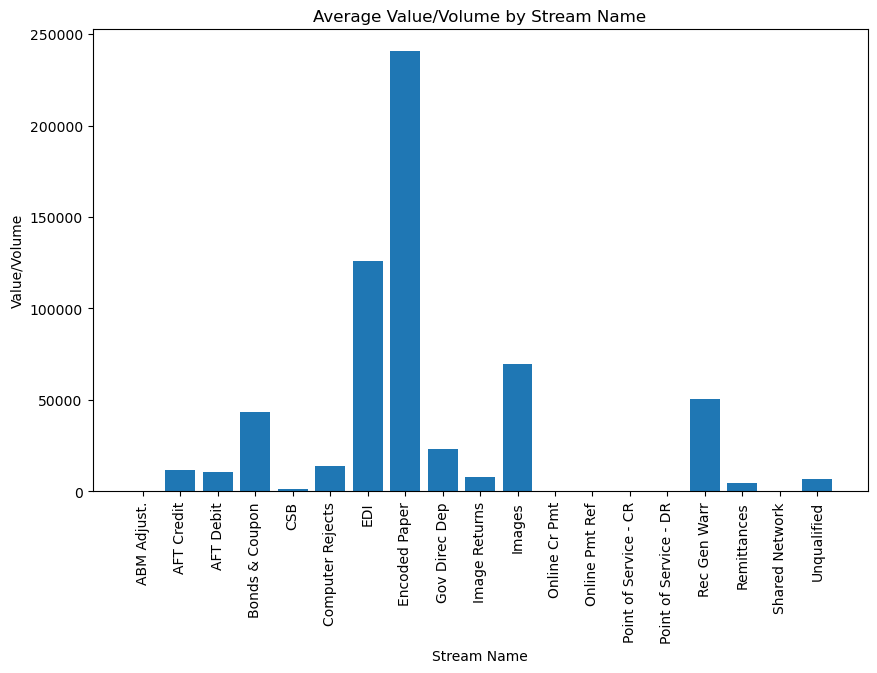

In [56]:
avg_by_stream = df.groupby('stream_name')['avg_val'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_by_stream['stream_name'], avg_by_stream['avg_val'])

plt.xlabel('Stream Name')
plt.ylabel('Value/Volume')
plt.title('Average Value/Volume by Stream Name')
plt.xticks(rotation=90)

plt.show()

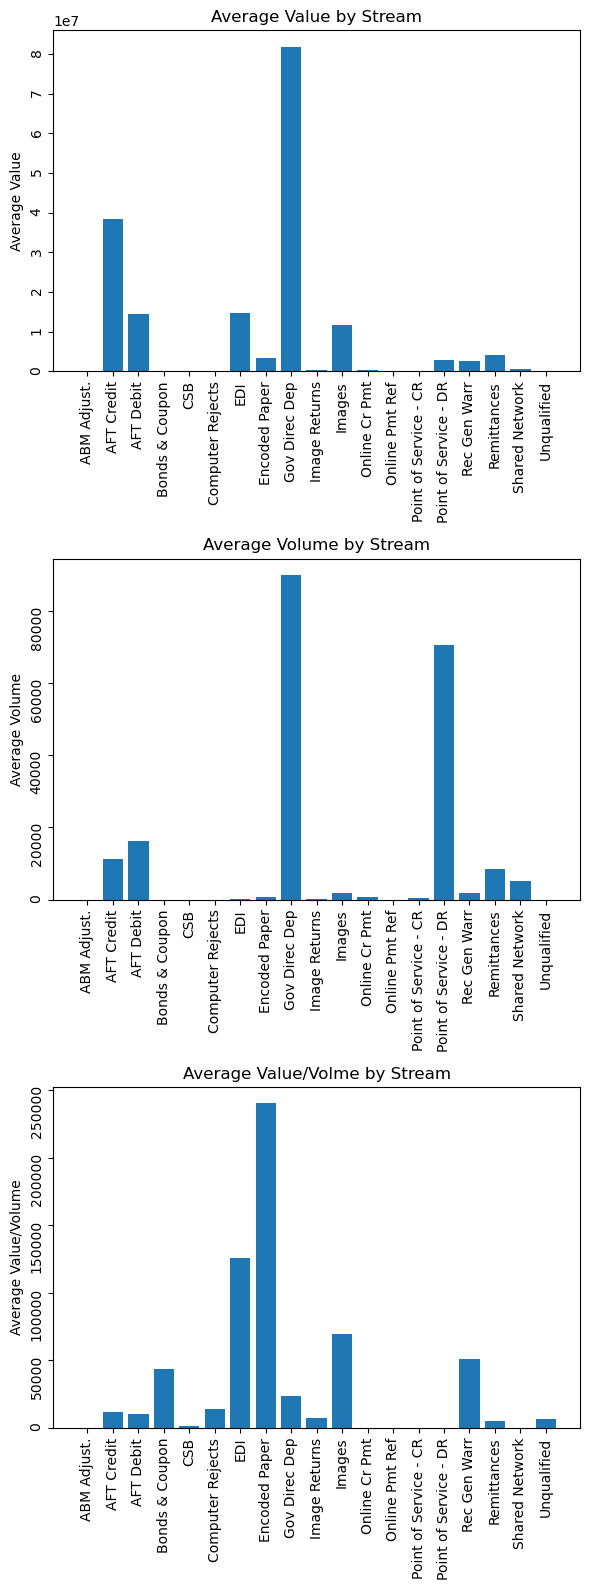

In [57]:
avg_by_stream = df.groupby('stream_name').agg({'value': 'mean', 'volume': 'mean', 'avg_val': 'mean'}).reset_index()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6,16))

ax1.bar(avg_by_stream['stream_name'], avg_by_stream['value'])
#ax1.set_xlabel('Stream Name')
ax1.set_ylabel('Average Value')
ax1.set_title('Average Value by Stream')
ax1.tick_params(rotation=90)

ax2.bar(avg_by_stream['stream_name'], avg_by_stream['volume'])
#ax2.set_xlabel('Stream Name')
ax2.set_ylabel('Average Volume')
ax2.set_title('Average Volume by Stream')
ax2.tick_params(rotation=90)

ax3.bar(avg_by_stream['stream_name'], avg_by_stream['avg_val'])
#ax3.set_xlabel('Stream Name')
ax3.set_ylabel('Average Value/Volume')
ax3.set_title('Average Value/Volme by Stream')
ax3.tick_params(rotation=90)
#ax3.set_ylim(0,2000)

plt.tight_layout()
plt.show()

In [96]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format the y-axis as trillions with a dollar sign
def trillions_formatter(x, pos):
    #return '${:.0f}T'.format(x*1e-12)
    return '%1.0fT' % (x * 1e-12)

def billions_formatter(x, pos):
    #return '${:.0f}B'.format(x*1e-9)
    return '%1.0fB' % (x * 1e-9)

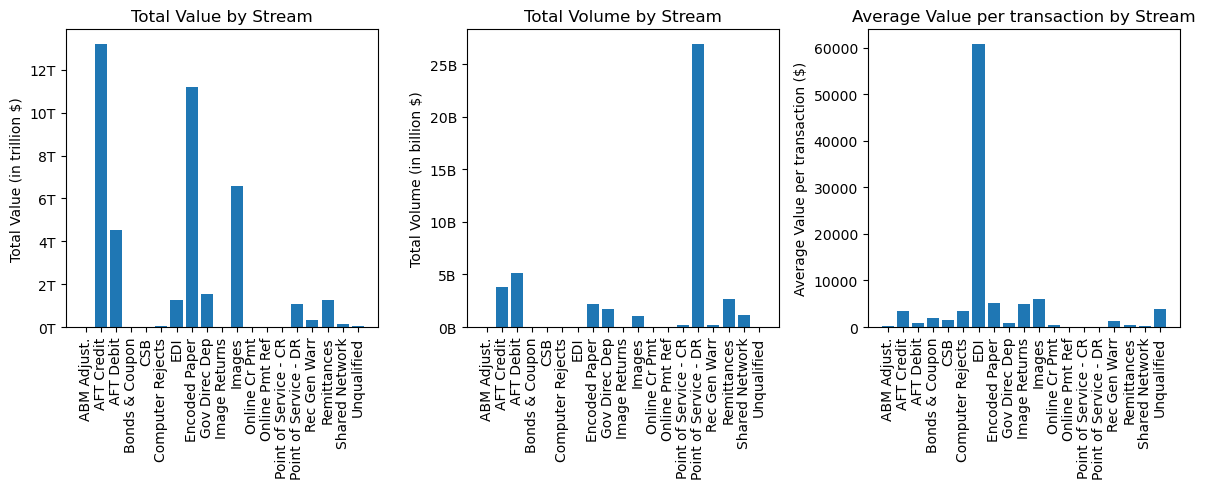

In [220]:
sum_by_stream = df.groupby('stream_name').agg({'value': 'sum', 'volume': 'sum'}).reset_index()

sum_by_stream['value_per_volume'] = sum_by_stream['value'] / sum_by_stream['volume']

#fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5,12))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))

# Total Value by Stream
ax1.bar(sum_by_stream['stream_name'], sum_by_stream['value'])
#ax1.set_xlabel('Stream Name')
ax1.set_ylabel('Total Value (in trillion $)')
ax1.set_title('Total Value by Stream')
ax1.tick_params(axis='x', rotation=90)
ax1.yaxis.set_major_formatter(FuncFormatter(trillions_formatter))

# Total Volume by Stream
ax2.bar(sum_by_stream['stream_name'], sum_by_stream['volume'])
#ax2.set_xlabel('Stream Name')
ax2.set_ylabel('Total Volume (in billion $)')
ax2.set_title('Total Volume by Stream')
ax2.tick_params(axis='x', rotation=90)
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))


# Average Value per transaction by Stream
ax3.bar(sum_by_stream['stream_name'], sum_by_stream['value_per_volume'])
#ax3.set_xlabel('Stream Name')
ax3.set_ylabel('Average Value per transaction ($)')
ax3.set_title('Average Value per transaction by Stream')
ax3.tick_params(axis='x', rotation=90)
#ax3.set_ylim(0, 2000)

plt.tight_layout()
plt.show()

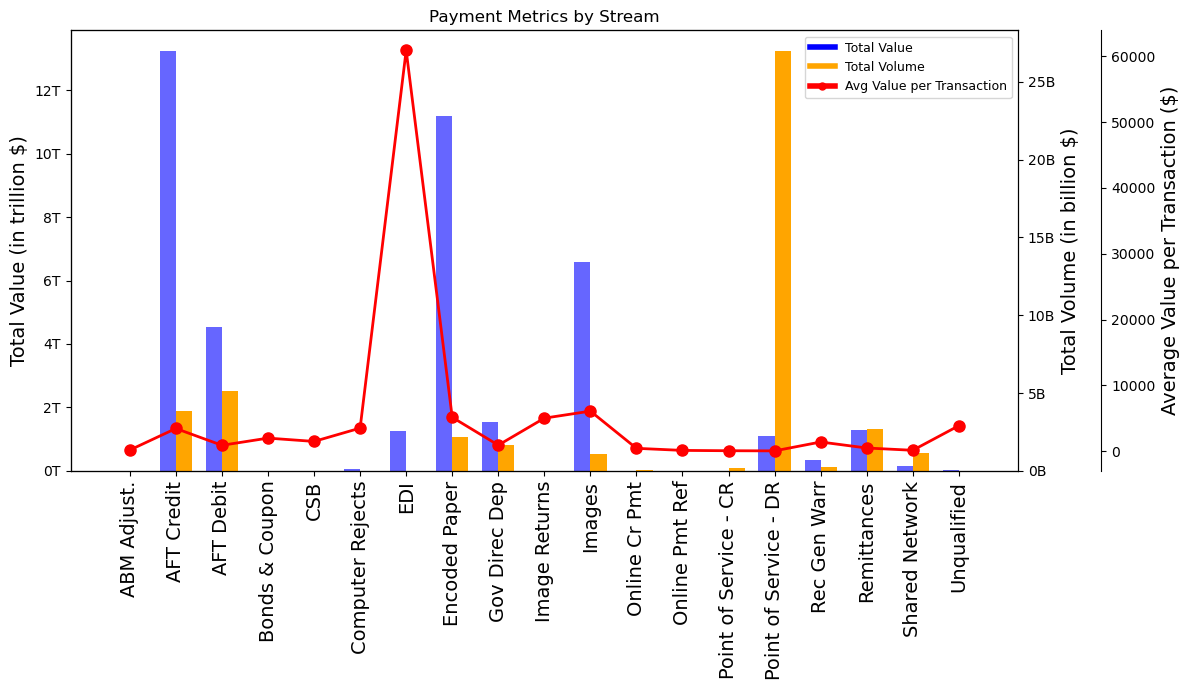

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

sum_by_stream = df.groupby('stream_name').agg({'value': 'sum', 'volume': 'sum'}).reset_index()
sum_by_stream['value_per_volume'] = sum_by_stream['value'] / sum_by_stream['volume']


# Set figure size
plt.figure(figsize=(12, 7))

# Create an axis
ax = plt.gca()

# Determine the width of each bar and positions
bar_width = 0.35
indices = np.arange(len(sum_by_stream['stream_name']))

# Plotting total value bars
ax.bar(indices - bar_width/2, sum_by_stream['value'], bar_width, label='Total Value', color='blue', alpha=0.6)

# Create a secondary y-axis for total volume
ax2 = ax.twinx()
ax2.bar(indices + bar_width/2, sum_by_stream['volume'], bar_width, label='Total Volume', color='orange', alpha=1)

# Set the y-axis label, ticks, and tick labels
ax.set_ylabel('Total Value (in trillion $)', fontsize=14)
ax2.set_ylabel('Total Volume (in billion $)',fontsize=14)
ax.set_xticks(indices)
ax.set_xticklabels([label_mapping.get(x, x) for x in sum_by_stream['stream_name']], fontsize=14, rotation=90)
ax.yaxis.set_major_formatter(FuncFormatter(trillions_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
ax.set_title('Payment Metrics by Stream')

# Plotting average value per transaction as a line plot
# Note: Adjusting the 'value_per_volume' scale is important for visibility.
# It shares the x-axis but uses a different scale, so choose the y-axis carefully based on your data.
ax3 = ax.twinx()
line_indices = indices  # Line plot at the center of bars
ax3.plot(line_indices, sum_by_stream['value_per_volume'], color='red', marker='o', linewidth=2, markersize=8, label='Avg Value/Transaction')
ax3.set_ylabel('Average Value per Transaction ($)', fontsize=14)
# Adjust right y-axis position for clarity if necessary
ax3.spines['right'].set_position(('outward', 60))

# Adding legend
# Creating a custom legend manually
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='red', lw=4, marker='o', markersize=5)]
ax.legend(custom_lines, ['Total Value', 'Total Volume', 'Avg Value per Transaction'], loc='upper right',fontsize=9)


plt.tight_layout()
plt.show()


In [222]:
import pandas as pd

# Assuming df is your DataFrame with 'stream_name', 'value', and 'volume' columns

# Group by 'stream_name' and sum 'value' and 'volume'
grouped = df.groupby('stream_name').agg(total_value=('value', 'sum'), total_volume=('volume', 'sum')).reset_index()

# Calculate the division of 'value' by 'volume'
grouped['value_per_volume'] = grouped['total_value'] / grouped['total_volume']

grouped


,stream_name,total_value,total_volume,value_per_volume
0,ABM Adjust.,1.709734e+07,1.007910e+05,169.631632
1,AFT Credit,1.322517e+13,3.842864e+09,3441.487359
2,AFT Debit,4.536711e+12,5.107924e+09,888.171199
3,Bonds & Coupon,3.809402e+07,1.923600e+04,1980.350453
4,CSB,3.828938e+09,2.592866e+06,1476.720472
5,Computer Rejects,4.543352e+10,1.298007e+07,3500.251463
6,EDI,1.256891e+12,2.063530e+07,60909.748895
7,Encoded Paper,1.119118e+13,2.176735e+09,5141.269048
8,Gov Direc Dep,1.536033e+12,1.687553e+09,910.213183
9,Image Returns,2.262421e+09,4.512900e+05,5013.231843


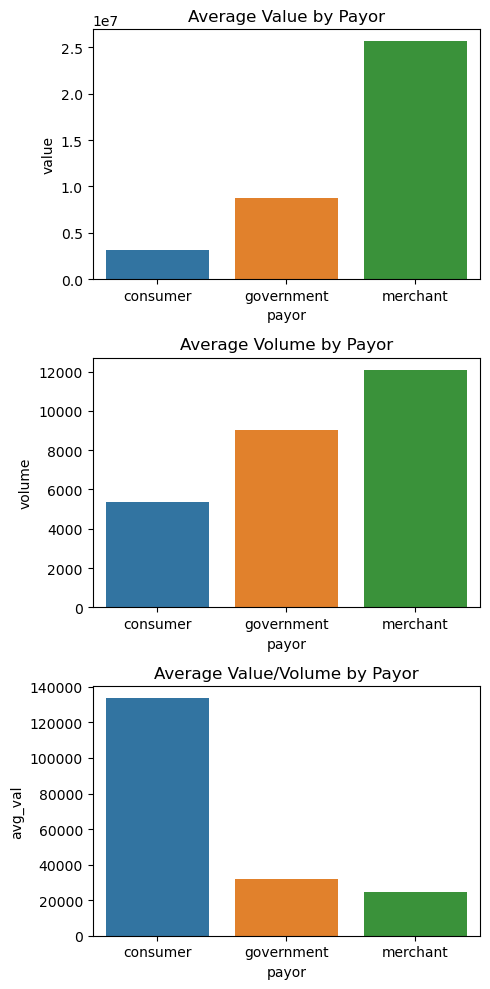

In [20]:
avg_by_payor = df.groupby('payor').agg({'value': 'mean', 'volume': 'mean', 'avg_val': 'mean'}).reset_index()
plt.figure(figsize=(5, 10))

plt.subplot(3, 1, 1) # The arguments are (nrows, ncols, index)
sns.barplot(data=avg_by_payor, x='payor', y='value')
plt.title('Average Value by Payor')

plt.subplot(3, 1, 2)
sns.barplot(data=avg_by_payor, x='payor', y='volume')
plt.title('Average Volume by Payor')

plt.subplot(3, 1, 3)
sns.barplot(data=avg_by_payor, x='payor', y='avg_val')
plt.title('Average Value/Volume by Payor')

plt.tight_layout()
plt.show()

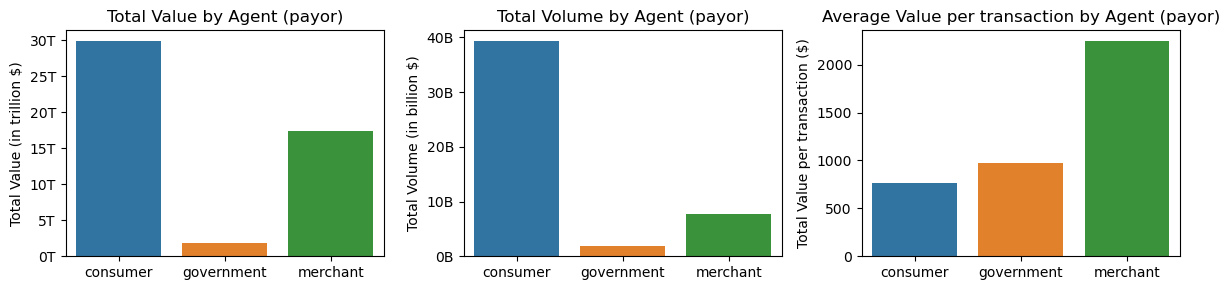

In [144]:
sum_by_payor = df.groupby('payor').agg({'value': 'sum', 'volume': 'sum'}).reset_index()
sum_by_payor['value_per_volume'] = sum_by_payor['value'] / sum_by_payor['volume']

#plt.figure(figsize=(5, 10))
plt.figure(figsize=(12, 3))

#plt.subplot(3, 1, 1) # The arguments are (nrows, ncols, index)
plt.subplot(1, 3, 1)
sns.barplot(data=sum_by_payor, x='payor', y='value')
plt.xlabel('')
plt.ylabel('Total Value (in trillion $)')
plt.title('Total Value by Agent (payor)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(trillions_formatter))


#plt.subplot(3, 1, 2)
plt.subplot(1, 3, 2)
sns.barplot(data=sum_by_payor, x='payor', y='volume')
plt.xlabel('')
plt.ylabel('Total Volume (in billion $)')
plt.title('Total Volume by Agent (payor)')
plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))

#plt.subplot(3, 1, 3)
plt.subplot(1, 3, 3)
sns.barplot(data=sum_by_payor, x='payor', y='value_per_volume')
plt.xlabel('')
plt.ylabel('Total Value per transaction ($)')
plt.title('Average Value per transaction by Agent (payor)')

plt.tight_layout()
plt.show()

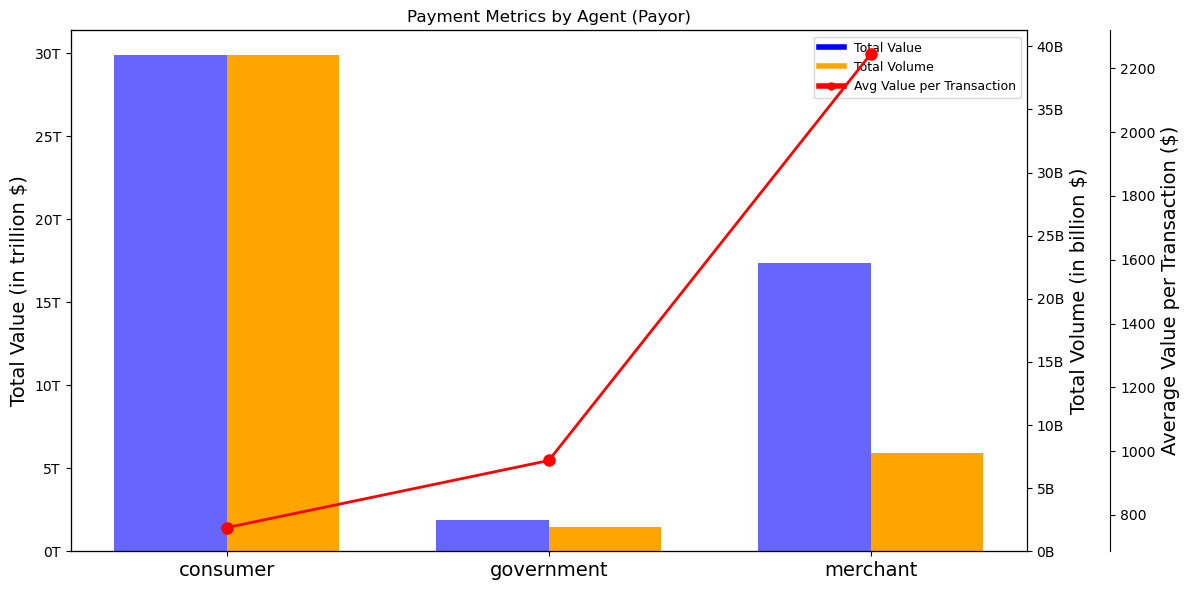

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

sum_by_payor = df.groupby('payor').agg({'value': 'sum', 'volume': 'sum'}).reset_index()
sum_by_payor['value_per_volume'] = sum_by_payor['value'] / sum_by_payor['volume']


# Set figure size
plt.figure(figsize=(12, 6))

# Create an axis
ax = plt.gca()

# Determine the width of each bar and positions
bar_width = 0.35
indices = np.arange(len(sum_by_payor['payor']))

# Plotting total value bars
ax.bar(indices - bar_width/2, sum_by_payor['value'], bar_width, label='Total Value', color='blue', alpha=0.6)

# Create a secondary y-axis for total volume
ax2 = ax.twinx()
ax2.bar(indices + bar_width/2, sum_by_payor['volume'], bar_width, label='Total Volume', color='orange', alpha=1)

# Set the y-axis label, ticks, and tick labels
ax.set_ylabel('Total Value (in trillion $)', fontsize=14)
ax2.set_ylabel('Total Volume (in billion $)',fontsize=14)
ax.set_xticks(indices)
ax.set_xticklabels([label_mapping.get(x, x) for x in sum_by_payor['payor']], fontsize=14)
ax.yaxis.set_major_formatter(FuncFormatter(trillions_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
ax.set_title('Payment Metrics by Agent (Payor)')

# Plotting average value per transaction as a line plot
# Note: Adjusting the 'value_per_volume' scale is important for visibility.
# It shares the x-axis but uses a different scale, so choose the y-axis carefully based on your data.
ax3 = ax.twinx()
line_indices = indices  # Line plot at the center of bars
ax3.plot(line_indices, sum_by_payor['value_per_volume'], color='red', marker='o', linewidth=2, markersize=8, label='Avg Value/Transaction')
ax3.set_ylabel('Average Value per Transaction ($)', fontsize=14)
# Adjust right y-axis position for clarity if necessary
ax3.spines['right'].set_position(('outward', 60))

# Adding legend
# Creating a custom legend manually
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='red', lw=4, marker='o', markersize=5)]
ax.legend(custom_lines, ['Total Value', 'Total Volume', 'Avg Value per Transaction'], loc='upper right',fontsize=9)


plt.tight_layout()
plt.show()


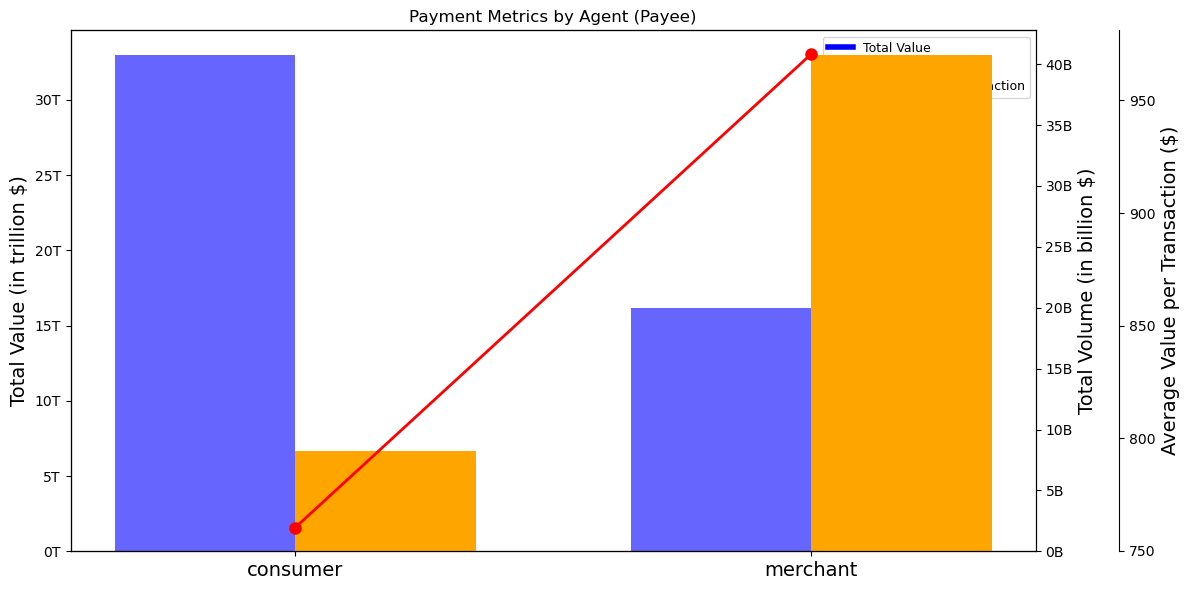

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

sum_by_payee = df.groupby('payee').agg({'value': 'sum', 'volume': 'sum'}).reset_index()
sum_by_payee['value_per_volume'] = sum_by_payor['value'] / sum_by_payor['volume']


# Set figure size
plt.figure(figsize=(12, 6))

# Create an axis
ax = plt.gca()

# Determine the width of each bar and positions
bar_width = 0.35
indices = np.arange(len(sum_by_payee['payee']))

# Plotting total value bars
ax.bar(indices - bar_width/2, sum_by_payee['value'], bar_width, label='Total Value', color='blue', alpha=0.6)

# Create a secondary y-axis for total volume
ax2 = ax.twinx()
ax2.bar(indices + bar_width/2, sum_by_payee['volume'], bar_width, label='Total Volume', color='orange', alpha=1)

# Set the y-axis label, ticks, and tick labels
ax.set_ylabel('Total Value (in trillion $)', fontsize=14)
ax2.set_ylabel('Total Volume (in billion $)',fontsize=14)
ax.set_xticks(indices)
ax.set_xticklabels([label_mapping.get(x, x) for x in sum_by_payee['payee']], fontsize=14)
ax.yaxis.set_major_formatter(FuncFormatter(trillions_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
ax.set_title('Payment Metrics by Agent (Payee)')

# Plotting average value per transaction as a line plot
# Note: Adjusting the 'value_per_volume' scale is important for visibility.
# It shares the x-axis but uses a different scale, so choose the y-axis carefully based on your data.
ax3 = ax.twinx()
line_indices = indices  # Line plot at the center of bars
ax3.plot(line_indices, sum_by_payee['value_per_volume'], color='red', marker='o', linewidth=2, markersize=8, label='Avg Value/Transaction')
ax3.set_ylabel('Average Value per Transaction ($)', fontsize=14)
# Adjust right y-axis position for clarity if necessary
ax3.spines['right'].set_position(('outward', 60))

# Adding legend
# Creating a custom legend manually
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='red', lw=4, marker='o', markersize=5)]
ax.legend(custom_lines, ['Total Value', 'Total Volume', 'Avg Value per Transaction'], loc='upper right',fontsize=9)


plt.tight_layout()
plt.show()


In [224]:
combination_counts = df.groupby(['payor', 'payee']).size().reset_index(name='count')
combination_counts

,payor,payee,count
0,consumer,consumer,5032233
1,consumer,merchant,1477172
2,government,consumer,213815
3,merchant,consumer,171009
4,merchant,merchant,468906


In [229]:
df['pay_comb'] = df['payor'] + '-' + df['payee']

In [232]:
df['pay_comb'].unique()

array(['consumer-merchant', 'consumer-consumer', 'government-consumer',
       'merchant-consumer', 'merchant-merchant'], dtype=object)

In [235]:
grouped = df.groupby('pay_comb').agg({
    'stream_name': lambda x: list(x.unique())  # List unique 'stream_name' values per group
}).reset_index()

grouped

,pay_comb,stream_name
0,consumer-consumer,"[Image Returns, Images, Encoded Paper, Unqualified, Computer Rejects]"
1,consumer-merchant,"[ABM Adjust., Online Pmt Ref, AFT Debit, Remittances, Point of Service - DR, Shared Network, Point of Service - CR, Online Cr Pmt]"
2,government-consumer,"[Gov Direc Dep, Bonds & Coupon, CSB, Rec Gen Warr]"
3,merchant-consumer,[AFT Credit]
4,merchant-merchant,"[AFT Credit, AFT Debit, Remittances, EDI]"


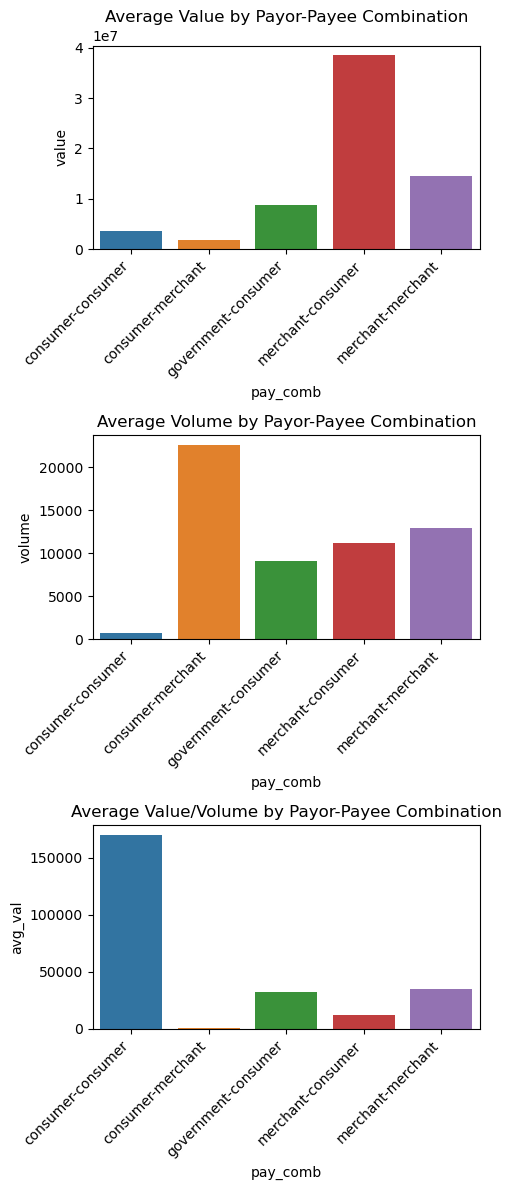

In [22]:
grouped_data = df.groupby('pay_comb').agg({'value': 'mean', 'volume': 'mean', 'avg_val': 'mean'}).reset_index()

plt.figure(figsize=(5, 12))

plt.subplot(3, 1, 1)
sns.barplot(data=grouped_data, x='pay_comb', y='value')
plt.xticks(rotation=45, ha='right')
plt.title('Average Value by Payor-Payee Combination')

plt.subplot(3, 1, 2) 
sns.barplot(data=grouped_data, x='pay_comb', y='volume')
plt.xticks(rotation=45, ha='right')
plt.title('Average Volume by Payor-Payee Combination')

plt.subplot(3, 1, 3) 
sns.barplot(data=grouped_data, x='pay_comb', y='avg_val')
plt.xticks(rotation=45, ha='right')
plt.title('Average Value/Volume by Payor-Payee Combination')

plt.tight_layout()
plt.show()

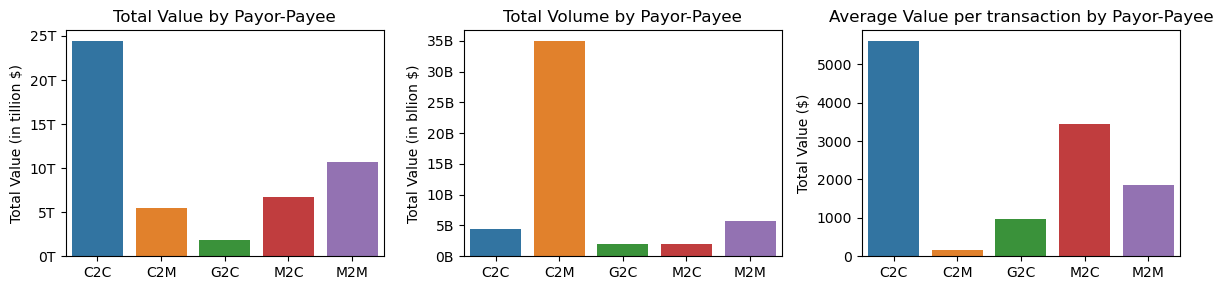

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sum_by_paycomb = df.groupby('pay_comb').agg({'value': 'sum', 'volume': 'sum'}).reset_index()
sum_by_paycomb['value_per_volume'] = sum_by_paycomb['value'] / sum_by_paycomb['volume']

label_mapping = {
    'consumer-consumer': 'C2C',
    'consumer-merchant': 'C2M',
    'government-consumer': 'G2C',
    'merchant-consumer': 'M2C',
    'merchant-merchant': 'M2M'
}

#plt.figure(figsize=(5, 10))
plt.figure(figsize=(12, 3))

# First subplot
#ax1 = plt.subplot(3, 1, 1)
ax1 = plt.subplot(1, 3, 1)
sns.barplot(data=sum_by_paycomb, x='pay_comb', y='value')
ax1.set_ylabel('Total Value (in tillion $)')
ax1.set_xlabel('')
ax1.set_xticklabels([label_mapping.get(x.get_text(), x.get_text()) for x in ax1.get_xticklabels()])
ax1.set_title('Total Value by Payor-Payee')
ax1.yaxis.set_major_formatter(FuncFormatter(trillions_formatter))

# Second subplot
#ax2 = plt.subplot(3, 1, 2)
ax2 = plt.subplot(1, 3, 2)
sns.barplot(data=sum_by_paycomb, x='pay_comb', y='volume')
ax2.set_ylabel('Total Value (in bllion $)')
ax2.set_xlabel('')
ax2.set_xticklabels([label_mapping.get(x.get_text(), x.get_text()) for x in ax2.get_xticklabels()])
ax2.set_title('Total Volume by Payor-Payee')
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Third subplot
#ax3 = plt.subplot(3, 1, 3)
ax3 = plt.subplot(1, 3, 3)
sns.barplot(data=sum_by_paycomb, x='pay_comb', y='value_per_volume')
ax3.set_ylabel('Total Value ($)')
ax3.set_xlabel('')
ax3.set_xticklabels([label_mapping.get(x.get_text(), x.get_text()) for x in ax3.get_xticklabels()])
ax3.set_title('Average Value per transaction by Payor-Payee')

plt.tight_layout()
plt.show()


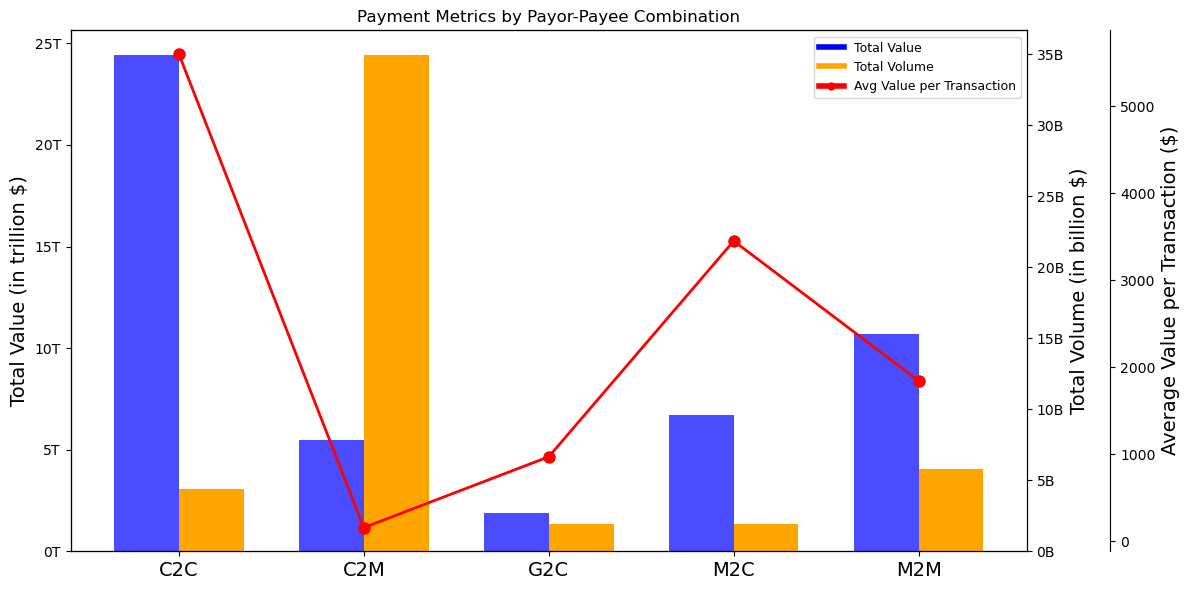

In [205]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

sum_by_paycomb = df.groupby('pay_comb').agg({'value': 'sum', 'volume': 'sum'}).reset_index()
sum_by_paycomb['value_per_volume'] = sum_by_paycomb['value'] / sum_by_paycomb['volume']

label_mapping = {
    'consumer-consumer': 'C2C',
    'consumer-merchant': 'C2M',
    'government-consumer': 'G2C',
    'merchant-consumer': 'M2C',
    'merchant-merchant': 'M2M'
}

# Helper functions for formatting the y-axis
def trillions_formatter(x, pos):
    return f'{x * 1e-12:.0f}T'

def billions_formatter(x, pos):
    return f'{x * 1e-9:.0f}B'

# Set figure size
plt.figure(figsize=(12, 6))

# Create an axis
ax = plt.gca()

# Determine the width of each bar and positions
bar_width = 0.35
indices = np.arange(len(sum_by_paycomb['pay_comb']))

# Plotting total value bars
ax.bar(indices - bar_width/2, sum_by_paycomb['value'], bar_width, label='Total Value', color='blue', alpha=0.7)

# Create a secondary y-axis for total volume
ax2 = ax.twinx()
ax2.bar(indices + bar_width/2, sum_by_paycomb['volume'], bar_width, label='Total Volume', color='orange', alpha=1)

# Set the y-axis label, ticks, and tick labels
ax.set_ylabel('Total Value (in trillion $)', fontsize=14)
ax2.set_ylabel('Total Volume (in billion $)',fontsize=14)
ax.set_xticks(indices)
ax.set_xticklabels([label_mapping.get(x, x) for x in sum_by_paycomb['pay_comb']], fontsize=14)
ax.yaxis.set_major_formatter(FuncFormatter(trillions_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
ax.set_title('Payment Metrics by Payor-Payee Combination')

# Plotting average value per transaction as a line plot
# Note: Adjusting the 'value_per_volume' scale is important for visibility.
# It shares the x-axis but uses a different scale, so choose the y-axis carefully based on your data.
ax3 = ax.twinx()
line_indices = indices  # Line plot at the center of bars
ax3.plot(line_indices, sum_by_paycomb['value_per_volume'], color='red', marker='o', linewidth=2, markersize=8, label='Avg Value/Transaction')
ax3.set_ylabel('Average Value per Transaction ($)', fontsize=14)
# Adjust right y-axis position for clarity if necessary
ax3.spines['right'].set_position(('outward', 60))

# Adding legend
# Creating a custom legend manually
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='red', lw=4, marker='o', markersize=5)]
ax.legend(custom_lines, ['Total Value', 'Total Volume', 'Avg Value per Transaction'], loc='upper right',fontsize=9)


plt.tight_layout()
plt.show()


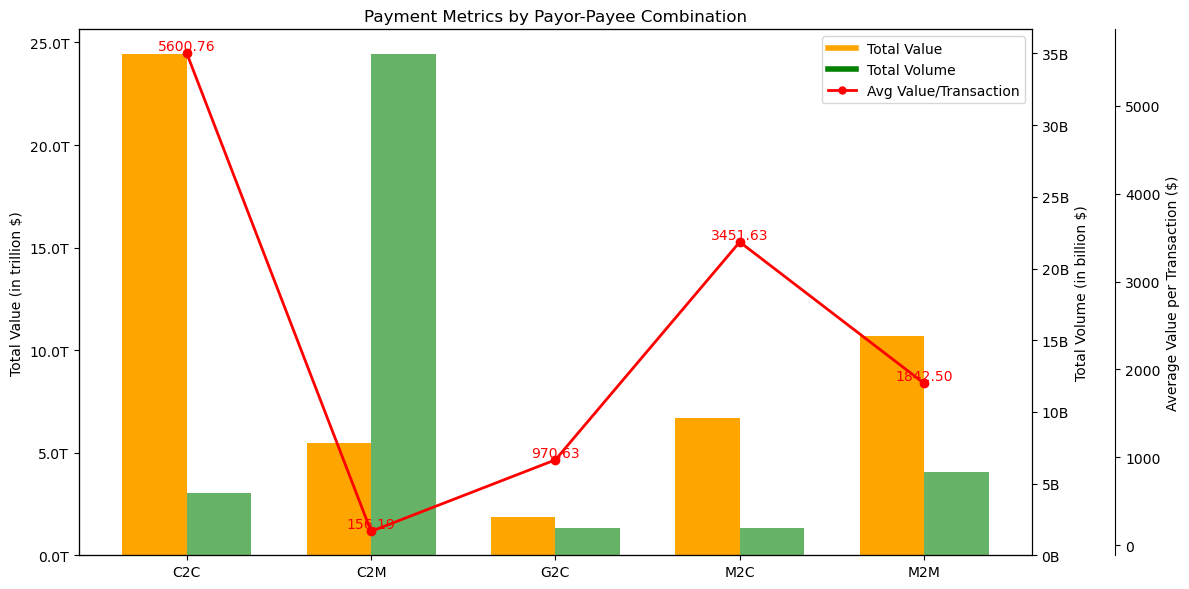

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Assuming sum_by_paycomb and label_mapping are predefined

# Helper functions for formatting the y-axis
def trillions_formatter(x, pos):
    return f'{x * 1e-12:.1f}T'

def billions_formatter(x, pos):
    return f'{x * 1e-9:.0f}B'

# Set figure size
plt.figure(figsize=(12, 6))

# Create an axis for Total Value
ax = plt.gca()

# Determine the width of each bar and positions
bar_width = 0.35
indices = np.arange(len(sum_by_paycomb['pay_comb']))

# Plotting total value bars
total_value_bars = ax.bar(indices - bar_width/2, sum_by_paycomb['value'], bar_width, label='Total Value', color='orange')

# Create a secondary y-axis for total volume
ax2 = ax.twinx()
total_volume_bars = ax2.bar(indices + bar_width/2, sum_by_paycomb['volume'], bar_width, label='Total Volume', color='green', alpha=0.6)

# Set the y-axis label, ticks, and tick labels
ax.set_ylabel('Total Value (in trillion $)')
ax2.set_ylabel('Total Volume (in billion $)')
ax.set_xticks(indices)
ax.set_xticklabels([label_mapping.get(x, x) for x in sum_by_paycomb['pay_comb']])
ax.yaxis.set_major_formatter(FuncFormatter(trillions_formatter))
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))
ax.set_title('Payment Metrics by Payor-Payee Combination')

# Plotting a line for average value per transaction
ax3 = ax.twinx()  # Use the same axis for aligning the line plot
ax3.plot(indices, sum_by_paycomb['value_per_volume'], color='red', marker='o', linewidth=2, label='Avg Value/Transaction')
ax3.set_ylabel('Average Value per Transaction ($)')
ax3.spines['right'].set_position(('outward', 60))

# Labeling average value per transaction directly on the graph, above each point
for i, value_per_volume in enumerate(sum_by_paycomb['value_per_volume']):
    ax3.text(i, value_per_volume, f'{value_per_volume:.2f}', ha='center', va='bottom', color='red')

# Creating a custom legend manually
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=2, marker='o', markersize=5)]
ax.legend(custom_lines, ['Total Value', 'Total Volume', 'Avg Value/Transaction'], loc='upper right')

plt.tight_layout()
plt.show()


In [23]:
df[df['pay_comb']=='consumer-consumer'].groupby('stream_name').count()

,delivery_id,version_number,system_code,cycle_date,delivery_number,record_type,settlement_date,receiving_inst_irn,region_node_code,sending_inst_irn,...,system_code_1,payment_id,value,volume,stream_code,stream_type,avg_val,payor,payee,pay_comb
stream_name,,,,,,,,,,,,,,,,,,,,,
Computer Rejects,452256,452256,452256,452256,452256,452256,452256,452256,0,452256,...,452256,452256,452256,452256,452256,452256,452256,452256,452256,452256
Encoded Paper,3351554,3351554,3351554,3351554,3351554,3351554,3351554,3351554,0,3351554,...,3351554,3351554,3351554,3351554,3351554,3351554,3351554,3351554,3351554,3351554
Image Returns,4879,4879,4879,4879,4879,4879,4879,4879,4879,4879,...,4879,4879,4879,4879,4879,4879,4879,4879,4879,4879
Images,560347,560347,560347,560347,560347,560347,560347,560347,560305,560347,...,560347,560347,560347,560347,560347,560347,560347,560347,560347,560347
Unqualified,663197,663197,663197,663197,663197,663197,663197,663197,0,663197,...,663197,663197,663197,663197,663197,663197,663197,663197,663197,663197


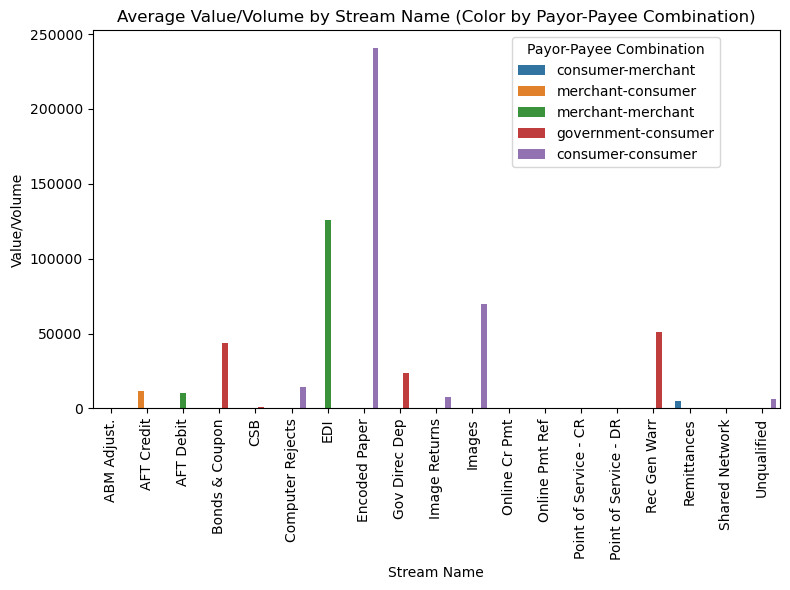

In [24]:
avg_by_stream_paycomb = df.groupby(['stream_name', 'pay_comb'])['avg_val'].mean().reset_index()

plt.figure(figsize=(8,6))
bar_plot = sns.barplot(data=avg_by_stream_paycomb, x='stream_name', y='avg_val', hue='pay_comb')

# Get the current locations and labels
locs, labels = plt.xticks()

# Set the locations and labels
plt.xticks(ticks=locs, labels=avg_by_stream_paycomb['stream_name'], rotation=90)

plt.xlabel('Stream Name')
plt.ylabel('Value/Volume')
plt.title('Average Value/Volume by Stream Name (Color by Payor-Payee Combination)')
plt.legend(title='Payor-Payee Combination', bbox_to_anchor=(0.6,1),loc='upper left')
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels

# Show the plot
plt.show()

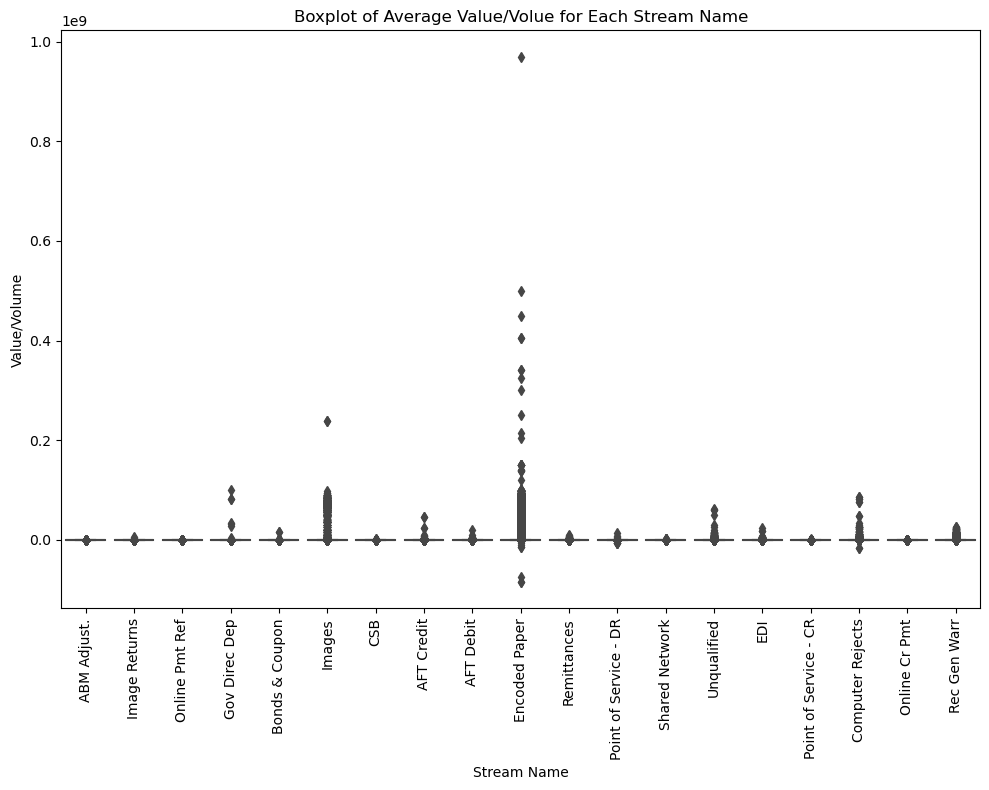

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='stream_name', y='avg_val')
plt.xlabel('Stream Name')
plt.ylabel('Value/Volume')
plt.title('Boxplot of Average Value/Volue for Each Stream Name')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# Clustering and Segmentation

In [123]:
df.columns

Index(['delivery_id', 'version_number', 'system_code', 'cycle_date',
       'delivery_number', 'record_type', 'settlement_date',
       'receiving_inst_irn', 'region_node_code', 'sending_inst_irn',
       'sent_date', 'sent_time', 'sender_user_id', 'sender_terminal_id',
       'settle_type', 'receiving_inst_name', 'sending_inst_name',
       'system_code_1', 'payment_id', 'value', 'volume', 'stream_code',
       'stream_name', 'stream_type', 'avg_val', 'payor', 'payee', 'pay_comb'],
      dtype='object')

In [124]:
drop_cols = ['sender_user_id', 'sender_terminal_id','payment_id','system_code_1']
df1 = df.drop(columns=drop_cols)
df1

,delivery_id,version_number,system_code,cycle_date,delivery_number,record_type,settlement_date,receiving_inst_irn,region_node_code,sending_inst_irn,...,sending_inst_name,value,volume,stream_code,stream_name,stream_type,avg_val,payor,payee,pay_comb
0,5d9fb58e-8af6-4c77-8bc5-c9204d4145ce,1,A,2019-05-13,R5,D,2019-05-14,3,TO,4,...,Toronto-Dominion Bank,933.00,4.0,A,ABM Adjust.,E,233.250000,consumer,merchant,consumer-merchant
1,051d4fb6-237a-4e24-a484-c40fba0eff02,1,A,2016-11-22,R5,D,2016-11-23,3,TO,2,...,Bank of Nova Scotia,732.75,5.0,A,ABM Adjust.,E,146.550000,consumer,merchant,consumer-merchant
2,00872297-5872-4cb9-8c65-46446e3bd697,1,A,2014-08-19,R4,D,2014-08-20,3,MT,6,...,Banque Nationale du Canada,81.50,2.0,A,ABM Adjust.,E,40.750000,consumer,merchant,consumer-merchant
3,dc4dd13a-1748-457b-b2a2-c461088cc434,1,A,2014-06-05,R5,D,2014-06-06,3,TO,2,...,Bank of Nova Scotia,383.50,2.0,A,ABM Adjust.,E,191.750000,consumer,merchant,consumer-merchant
4,294fdf69-57cb-4921-a2c0-f752dea3db97,1,A,2019-11-13,R5,D,2019-11-14,815,TO,4,...,Toronto-Dominion Bank,471.75,3.0,A,ABM Adjust.,E,157.250000,consumer,merchant,consumer-merchant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236183,a0cdebec-8c2f-4fa8-bcb5-fe13acfdfb23,1,A,2014-07-25,X9,D,2014-07-28,177,NaN,1,...,Bank of Montreal,2415366.42,13.0,G,Rec Gen Warr,P,185797.416923,government,consumer,government-consumer
8236184,1fea0f15-aef9-4364-9ba6-ad6980caf4d2,1,A,2016-05-16,X9,D,2016-05-17,177,NaN,2,...,Bank of Nova Scotia,53673.29,1.0,G,Rec Gen Warr,P,53673.290000,government,consumer,government-consumer
8236185,5b195c18-7667-4235-a567-1b3a51e79293,1,A,2016-01-25,X9,D,2016-01-26,177,NaN,2,...,Bank of Nova Scotia,412.03,3.0,G,Rec Gen Warr,P,137.343333,government,consumer,government-consumer
8236186,9cfd47f3-b9d1-4d27-9ae8-6bed06e5ea95,1,A,2015-04-02,X9,D,2015-04-06,177,NaN,3,...,Royal Bank of Canada,1916141.18,13.0,G,Rec Gen Warr,P,147395.475385,government,consumer,government-consumer


In [125]:
df1.nunique()

delivery_id            3267566
version_number              11
system_code                  2
cycle_date                1559
delivery_number             46
record_type                  3
settlement_date           1512
receiving_inst_irn          12
region_node_code             6
sending_inst_irn            12
sent_date                 1842
sent_time                 1440
settle_type                  3
receiving_inst_name         12
sending_inst_name           12
value                  6082729
volume                  185760
stream_code                 21
stream_name                 19
stream_type                  2
avg_val                6441811
payor                        3
payee                        2
pay_comb                     5
dtype: int64

In [126]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [127]:
def categorical_transform(df, ordinal_mappings=None):

    if ordinal_mappings is None:
        ordinal_mappings = {}
    
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() == 2:
            unique_values = df[col].unique()
            df[col] = df[col].map({unique_values[0]: 0, unique_values[1]: 1})

    for col, mapping in ordinal_mappings.items():
        df[col] = df[col].map(mapping)

    # check if 'income' column exists
    income_exists = 'income' in df.columns
    
    for col in df.select_dtypes(include=['object']).columns:
            df[col] = pd.Categorical(df[col]).codes

    return df

ordinal_mappings = {
}

In [128]:
df1 = categorical_transform(df1, ordinal_mappings)
df1

,delivery_id,version_number,system_code,cycle_date,delivery_number,record_type,settlement_date,receiving_inst_irn,region_node_code,sending_inst_irn,...,sending_inst_name,value,volume,stream_code,stream_name,stream_type,avg_val,payor,payee,pay_comb
0,1199001,0,0,1393,23,0,1352,3,3,4,...,11,933.00,4.0,0,0,0,233.250000,0,0,1
1,66107,0,0,752,23,0,730,3,3,2,...,3,732.75,5.0,0,0,0,146.550000,0,0,1
2,6752,0,0,164,22,0,161,3,2,6,...,5,81.50,2.0,0,0,0,40.750000,0,0,1
3,2813702,0,0,111,23,0,109,3,3,2,...,3,383.50,2.0,0,0,0,191.750000,0,0,1
4,530534,0,0,1525,23,0,1479,815,3,4,...,11,471.75,3.0,0,0,0,157.250000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8236183,2056528,0,0,147,36,0,144,177,-1,1,...,2,2415366.42,13.0,6,15,1,185797.416923,1,1,2
8236184,410054,0,0,616,36,0,599,177,-1,2,...,3,53673.29,1.0,6,15,1,53673.290000,1,1,2
8236185,1166618,0,0,536,36,0,520,177,-1,2,...,3,412.03,3.0,6,15,1,137.343333,1,1,2
8236186,2007958,0,0,325,36,0,317,177,-1,3,...,10,1916141.18,13.0,6,15,1,147395.475385,1,1,2


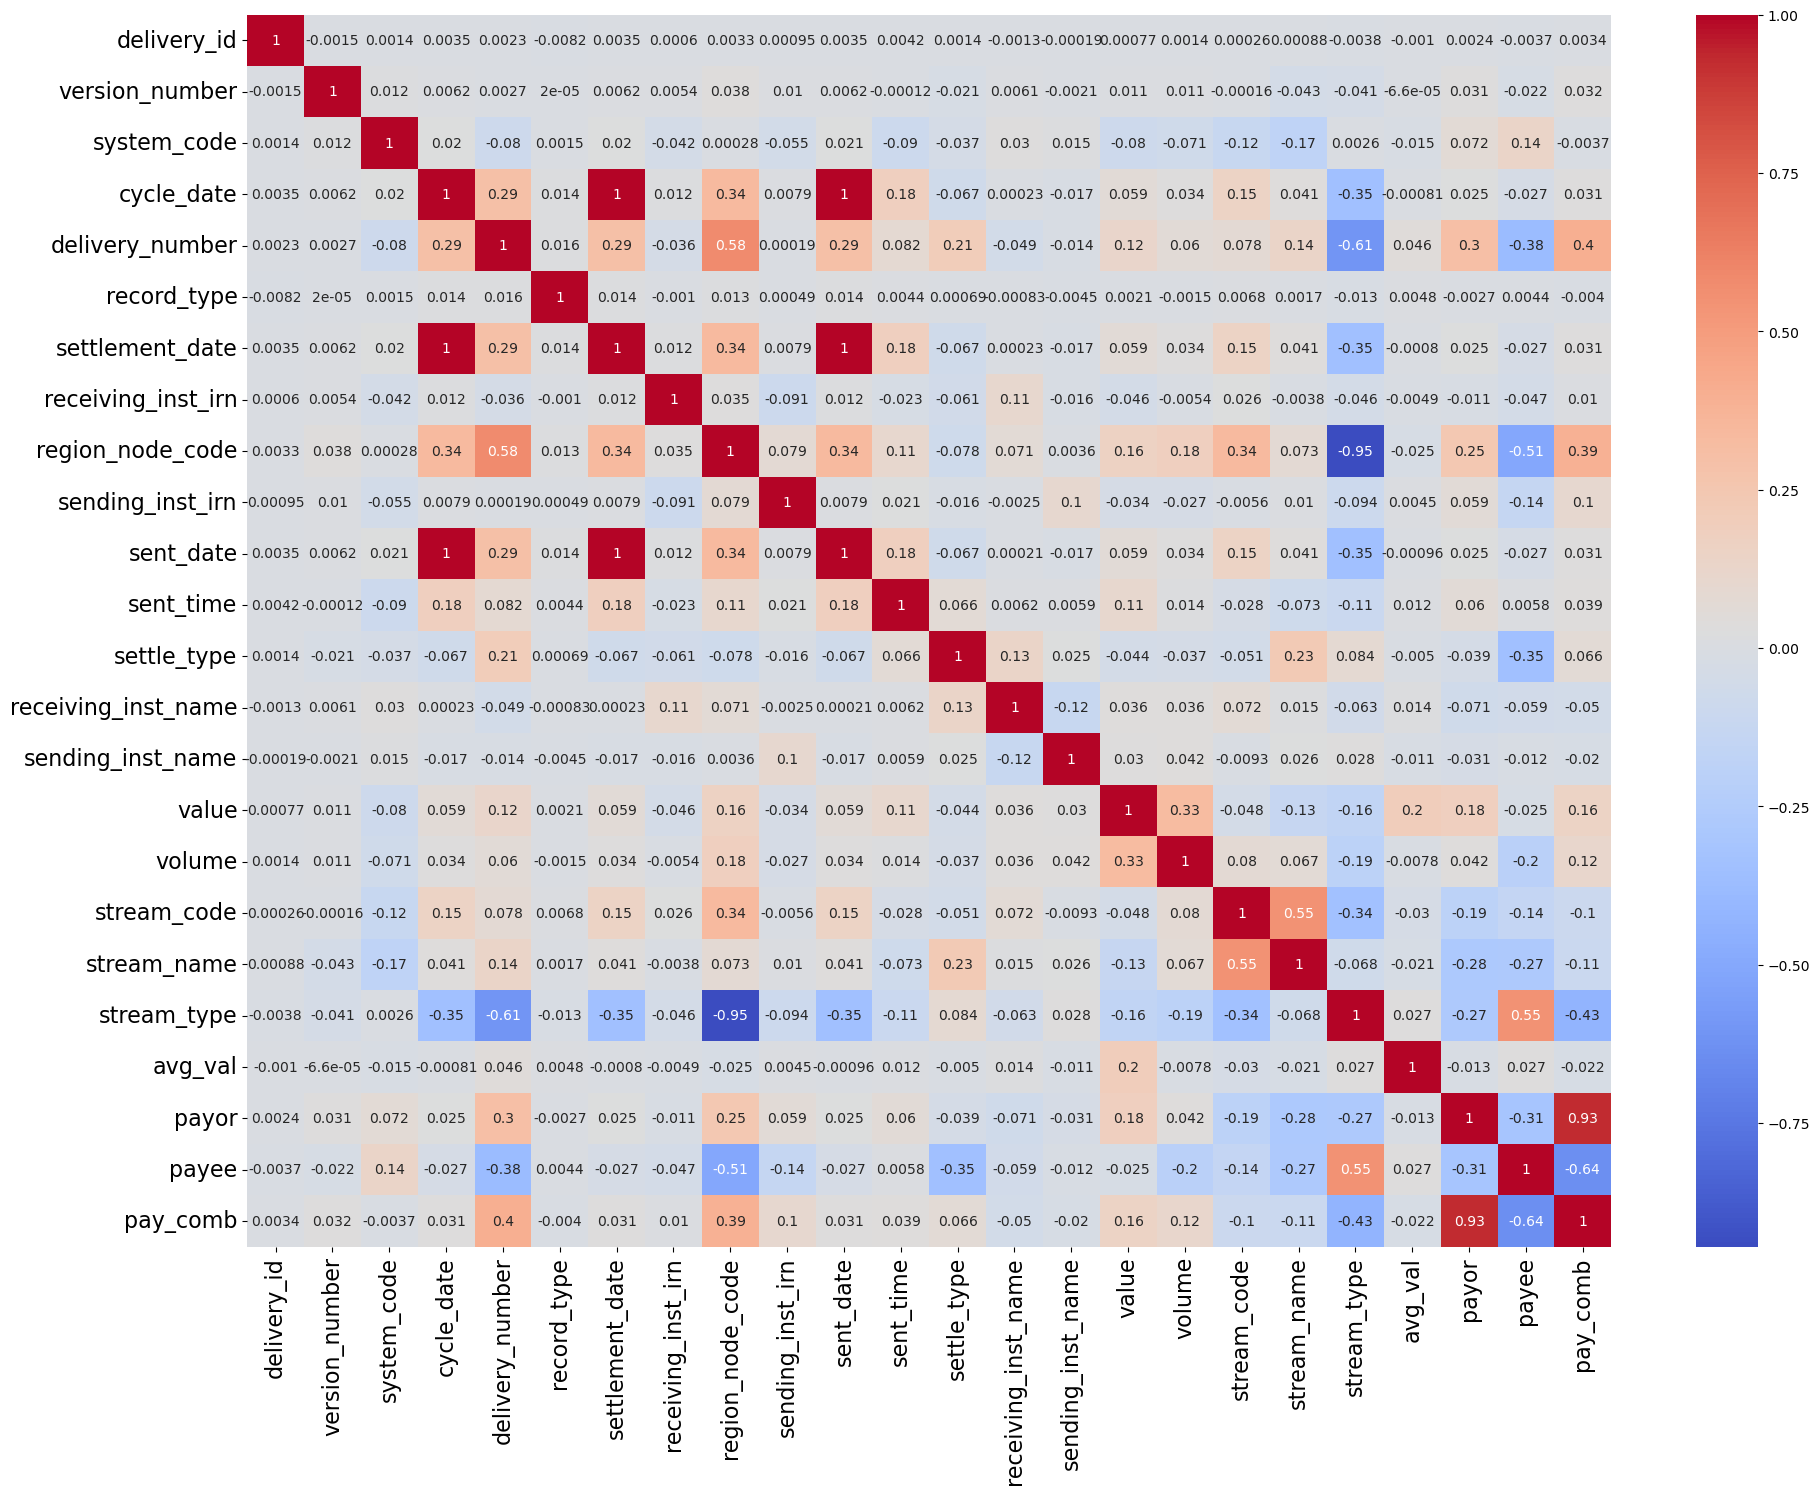

In [137]:
correlation = df1.corr()
plt.figure(figsize=(22, 16))
ax = sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Increase font size of the x-axis and y-axis tick labels
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=16)

# If you need to rotate the tick labels for better visibility you can also include rotation
# ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=14, rotation=45)
# ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=14, rotation=45)

plt.show()